<a href="https://colab.research.google.com/github/Vinisha-B/Landslide_Prediction/blob/main/Landslide_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

df = pd.read_csv('/content/regenerated_landslide_risk_dataset.csv')  # replace with actual file name
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   Temperature (°C)  Humidity (%)  Precipitation (mm)  Soil Moisture (%)  \
0                17            68                 176                 64   
1                26            33                  65                 24   
2                16            81                  56                 52   
3                25            53                 136                 70   
4                34            77                  23                 37   

   Elevation (m) Landslide Risk Prediction  
0            120                       Low  
1            672                       Low  
2             36                       Low  
3            583                       Low  
4            130                       Low  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Temperature (°C)           5000 non-null   int64 
 1

Data Preprocessing

In [16]:
label_encoder = LabelEncoder()
df['Risk_Level'] = label_encoder.fit_transform(df['Landslide Risk Prediction'])

X = df.drop(['Landslide Risk Prediction', 'Risk_Level'], axis=1)
y = df['Risk_Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train the Model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
residuals = y_test.values - y_pred

print("✅ Accuracy:", accuracy)
print("✅ F1 Score:", f1)

✅ Accuracy: 0.998
✅ F1 Score: 0.9979889122977609


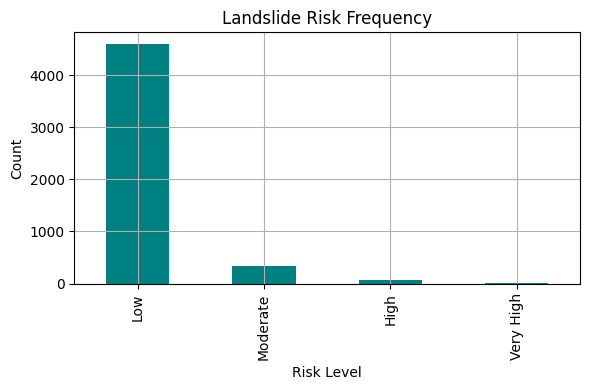

In [20]:
plt.figure(figsize=(6, 4))
df['Landslide Risk Prediction'].value_counts().plot(kind='bar', color='teal')
plt.title("Landslide Risk Frequency")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

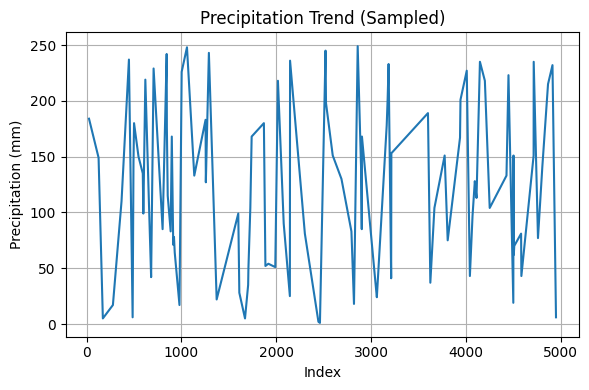

In [21]:
plt.figure(figsize=(6, 4))
df.sample(100).sort_index()['Precipitation (mm)'].plot()
plt.title("Precipitation Trend (Sampled)")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Index")
plt.grid(True)
plt.tight_layout()
plt.show()

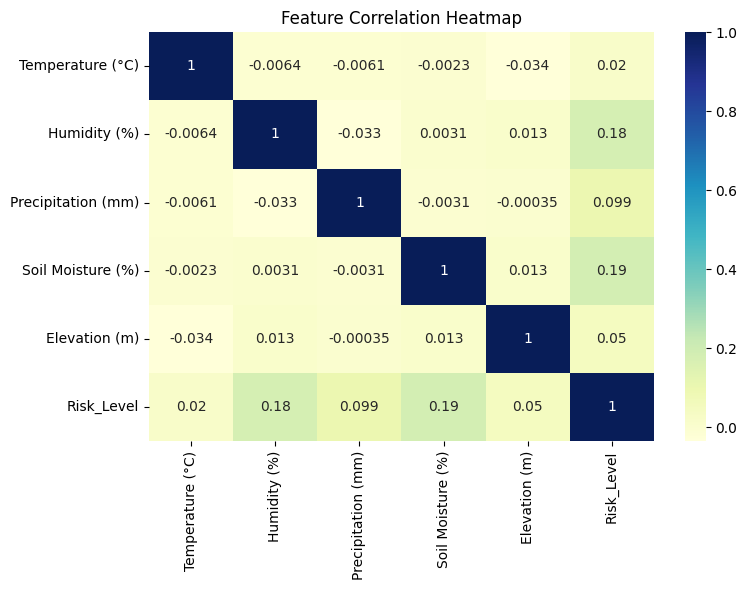

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('Landslide Risk Prediction', axis=1).corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

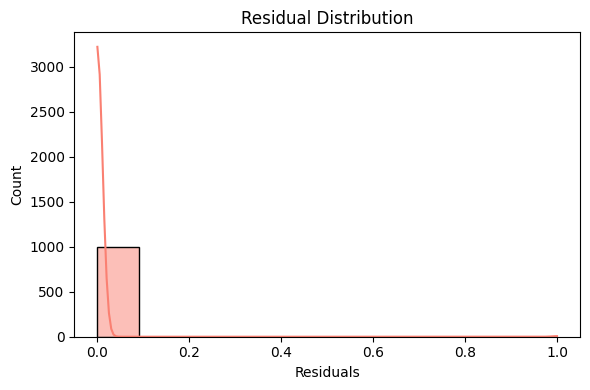

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='salmon')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()